Epoch 1/50
 - 0s - loss: 0.0989
Epoch 2/50
 - 0s - loss: 0.0559
Epoch 3/50
 - 0s - loss: 0.0331
Epoch 4/50
 - 0s - loss: 0.0236
Epoch 5/50
 - 0s - loss: 0.0203
Epoch 6/50
 - 0s - loss: 0.0186
Epoch 7/50
 - 0s - loss: 0.0176
Epoch 8/50
 - 0s - loss: 0.0169
Epoch 9/50
 - 0s - loss: 0.0157
Epoch 10/50
 - 0s - loss: 0.0148
Epoch 11/50
 - 0s - loss: 0.0140
Epoch 12/50
 - 0s - loss: 0.0129
Epoch 13/50
 - 0s - loss: 0.0121
Epoch 14/50
 - 0s - loss: 0.0112
Epoch 15/50
 - 0s - loss: 0.0105
Epoch 16/50
 - 0s - loss: 0.0097
Epoch 17/50
 - 0s - loss: 0.0088
Epoch 18/50
 - 0s - loss: 0.0081
Epoch 19/50
 - 0s - loss: 0.0075
Epoch 20/50
 - 0s - loss: 0.0070
Epoch 21/50
 - 0s - loss: 0.0065
Epoch 22/50
 - 0s - loss: 0.0060
Epoch 23/50
 - 0s - loss: 0.0055
Epoch 24/50
 - 0s - loss: 0.0052
Epoch 25/50
 - 0s - loss: 0.0049
Epoch 26/50
 - 0s - loss: 0.0047
Epoch 27/50
 - 0s - loss: 0.0045
Epoch 28/50
 - 0s - loss: 0.0043
Epoch 29/50
 - 0s - loss: 0.0043
Epoch 30/50
 - 0s - loss: 0.0041
Epoch 31/50
 - 0s -

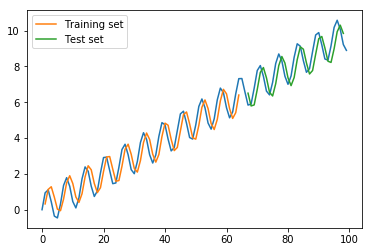

In [5]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import os
import numpy as np
import math

# Necessary for some OSX version
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

LEN_DATASET = 100
EPOCHS = 50
BATCH_SIZE = 1

# It's going to be used to
# reshape into X=t and Y=t+1
look_back = 1

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return numpy.array(X), numpy.array(Y)


# fix a random seed for reproducibility
numpy.random.seed(11)

sin_wave = np.array(
    [math.sin(x) + i * 0.1 for i, x in enumerate(np.arange(LEN_DATASET))])
dataset = sin_wave.reshape(len(sin_wave), 1)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 2/3)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
X_train = numpy.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = numpy.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=2)

# Making the predictions
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

# Re-applying the scaling to the predictions
predictions_train = scaler.inverse_transform(predictions_train)
predictions_test = scaler.inverse_transform(predictions_test)

y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[0], predictions_train[:, 0]))
testScore = math.sqrt(mean_squared_error(y_test[0], predictions_test[:, 0]))

print('Train RMSE: %.2f ' % (trainScore))
print('Test RMSE: %.2f ' % (testScore))

# shift train predictions for plotting
predictions_train_plot = numpy.empty_like(dataset)
predictions_train_plot[:, :] = numpy.nan
predictions_train_plot[look_back:len(predictions_train) + look_back, :] = predictions_train

# shift test predictions for plotting
predictions_test_plot = numpy.empty_like(dataset)
predictions_test_plot[:, :] = numpy.nan
predictions_test_plot[len(predictions_train) + (look_back * 2) + 1:len(dataset) -
                1, :] = predictions_test

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(predictions_train_plot, label='Training set')
plt.plot(predictions_test_plot, label='Test set')
plt.legend(loc='upper left')
plt.show()


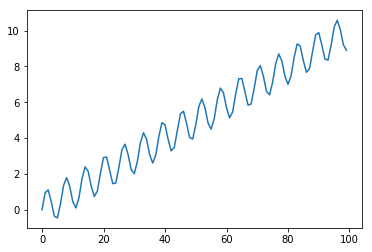

In [4]:
plt.plot(sin_wave)